# <center> <b><span style="color:blue">Mchine Learning Strategy For Detecting Cyber attacks on Industrial Control Systems  (ICS) </b> </span></center>

---
## Problem Description 
In this notebook we looking in to detecting or predicting attacks on industrial control systems ICS using Machine Learning techniques.

## Project Outline: 
- Apply machine learning techniques to predict attacks on industrial systems using HAI-ICS time series dataset.
- Evaluate and analyze HAI dataset time series aspects ( stationary , seasonality ,etc ) and attributes to detect anomalies and thresholds.
- Visualize the process and the results using  different machine learning and statistical visualization techniques. 
- Apply different machine learning models such as  (VAR , ISOLATION FOREST, Logisitic Regression.. etc) and dimensionality reduction technique such as prinicpal component analysis (PCA) to make our prediction.

## Motivation

Industrial Control Systems (ICS) can be found in a variety of places, from automated manufacturing machinery to the cooling system of an office building.
ICS were formerly expected to be based on certain operating systems and communication protocols. However, in recent years, network connections based on general-purpose operating systems and common communication protocols have decreased system development costs and increased productivity.
These threat actors and rogue states are frequently motivated by financial gain, political purpose, or even a military goal while carrying out assaults. State-sponsored attacks are possible, but so are attacks by competitors, insiders with a hostile intent, and even hacktivists.
As a result, the ability to detect abnormalities ahead of time and mitigate risks is a very useful capacity that allows for the prevention of not just cyber assaults, but also downtime, maintenance, and unscheduled downtime.

This problem presents another example of anomaly detection and binary classification predictive modeling.

## Overview of HAI Dataset: 
The HAI dataset was collected from a realistic industiral control system (ICS) testbed augmented with a Hardware-In-the-Loop (HIL) simulator that emulates steam-turbine power generation and pumped-storage hydropower generation.

The dataset contains several measurement channels (e.g., sensors, actuators, and control devices) that depict the current state of the systems.It's also available in two variants. 

We will be using the last version (21.03) which has a mixture of 20 attack scenarios and 33 interval data.HAI 21.03 was released in 2021, and is based on a more tightly coupled HIL simulator to produce clearer attack effects with additional attacks. 

The HAI dataset is currently available on the project github page which can be found at <b> (https://github.com/icsdataset/hai)</b>. The data is collected as part of a reseaarch to advance understanding of attack on ICS systems in South Korea. It's worth mentioning there is a comptetion 

The dataset attributes comprised from the followings:

1. <b>time</b> : This is the first column and it represents the observed local time as “yyyy-MM-dd hh:mm:ss,” while the rest columns provide the recorded SCADA data points - column 01 
2. <b>P1_B2004...P4_HT_LD </b>:  contains data collected from different setpoints and sensors in the process. These values are neumeric values.
3. <b>attack</b>: provides an info for whether an attack occured or not{1,0}. Where this is applicable to any attack happening on all the processes.last column.
    

    
    ### Identifying Important Attributes (Manual Anlysis of Technical Specs)

So analysis of the dataset attributes reveal the fact that there is 80 features. We know nomral scenarios involved operator using 4 controllers and 2 simulation models points (set points) .
We also know abnormal scenario occured when some of the parameters were not within the limits of the normal range or in unexpetded states due to attacks, malfunctions, and failures [1].

before we work on the dataset attributes and apply our models we need to prepare the dataset. There are  three attack types targeting those systems:

  - Setpoints attacks: Forcing setpoints value to change the controlle variables
  - Target points attacks: Forcing the control operator value directly.
  - Response Prevention attacks: Involves hiding abnormal response on Human Machine Interface HMI (dashboards)
    
Since our attacks scenarios involved attacking specific controllers that influence the system when different set points and target points values are changed according to the technical details document provided by HAI researchers. 

We could compile those data and consider the following attributes as good predictors

##### Set points & target points:
<table>
<tr><th>Table 1-Set points </th><th>Table 2-Target points (Attack)</th><th>Table 3-Description</th></tr>
<tr><td>
    
|No|Name|Description|
|---|---|---|
|1|P1_B2004| Set point (Controller P1-PC|
|2|P1_B3004| Set Point (Controller P1-LC|
|3|P1_B3005| Set Point (Controller P1-FC|
|4|P1_B4002| Set Point (Controller P1-TC|
|5|P4_ST_PS| Set Point (Controller P4-ST|
|6|P4_HT_PS| Set Point (Controller P4-HT|

</td><td>
    
|No|Name|Description|
|---|---|---|
|1|P2_VTR02| Target point |
|2|P1_B2016| Target Point |
|3|P1_LCV01D| Target Point|
|4|P1_FT03| Target Point |
|5|P1_FCV03D| Target Point |
|6|P2_VTR01| Target Point |
|7|P1_LIT01| Target Point |
|8|P1_B3004| Target Point |
|9|P1_PCV01D| Target Point |
|10|P1_PIT01| Target Point |
|11|P2_ASD| Target Point |
|12|P2_SIT01| Target Point |
|13|P2_LCV01D| Target Point |
|14|P3_LCP01D| Target Point |
|15|P2_CO_RPM| Target Point |
|16|P2_RTR| Target Point |
    
</td><td>

|No|Name|Unit|Description|
|---|---|---|---|
|1|P1_B2004|bar|Heat Exchanger Outlet Pressure set point|
|2|P1_B3004|mm|Water Level setpoint|
|3|P1_B3005|I/h|Discharge flowrate setpoint (return to water tank)|
|4|P1_B4002|C|Heat exchanger outlet temperature setpoint |
|5|P4_ST_PS|MW|Scheduled power demand of STM|
|6|P4_HT_PS|MW|Scheduled power demand of HTM|
|7|P2_VTR02|Um |Preset vigration limit for sensor |
|8|P1_B2016|bar|Pressure demand for thermal power output control|
|9|P1_PIT01|bar|Heat exchanger outlet pressure |
|10|P1_LCV01D|% |Position Command for LCV01 |
|11|P1_FT03| mmH2O|Measured flowrate of returnwater tank |
|12|P1_FCV01D|%|Position command for FC01 valve|
|13|P1_FCV03D|% |Position command for FCV03 valve|
|14|P2_VTR01|um |Preset vibration limit for sensor P2_VIBTR01 |
|15|P1_LIT01|%|Water level of the upper water tank|
|16|P3_LCP01D|-|Speed command for pump LCP01 |
|17|P2_RTR|RPM|RPM trip rate|
|18|P2_SIT01|RPM|Current turbine RPM measured by speed probe|
|19|P1_PCV01D|%|Position Command for valve PCV01 |
|20|P2_CO_rpm |-|Control output value of speed controller |
|20|P2_ASD|RPM| Auto Speed Demand|
|21|attack |-|Normal Condition = 0 / Abnomral Condition =1|
    
</td></tr> </table>

    
                        
                         
Using those attribute and setpoints will be the focus of our dataset.

Since the attack scenarios are configured based on the four variables of the feedback control loop , namely :
1. the set points (SP) , process variables (PV) , control variables CV and control parameters CP according to the technical details.

                        
                        

## Model Structure :

The diagram below illustrates our model pipeline :
<div>
<img src="images/ml-diagram.png" align="center" alt="Model Arch. Diagram"  width="1400"/>
</div>

1. Loading the dataset and work on analyzing the data and the features.
2. Analayze the attributes and understand the process and the variables impact.
3. Time series data test - stationary, trends etc 
4. Evaluate Machine Learning Models.


## <b><span style="color:blue">Installing Packages</b></span>
Uncomment the following line and paste it in to a codebox to install the packages:
```
* !pip install yellowbrick
* !pip install seaborn
* !pip install scipy
* !pip install statsmodels
* !pip install imbalanced-learn
* !pip install lightgbm
* !pip install xgboost

```

## <b><span style="color:blue">Import Libraries <b></span> 
    
Import some of the required libraries that we will need to build our anomaly detection solution.


In [4]:
# Main 
import os
import pandas as pd
import numpy as np
from pathlib import Path  
from datetime import date

In [5]:
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Seaborn Styling 
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)
from matplotlib.dates import DateFormatter
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [6]:
# Data Preperation 
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import log_loss


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline



from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


from numpy import where
from collections import Counter
import scipy.stats


from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

# Algorithms 

from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier 
from statsmodels.tsa.vector_ar.var_model import VAR
import lightgbm as lgb
import xgboost as xgb 

import warnings
warnings.simplefilter('ignore')

## <span style="color:blue"><b>Loading the HAI Dataset </b></span>

The first step is data acquisition we read the data directly from the github site.

In [7]:
current_path = os.getcwd()
print(current_path)

# Load the dataset original
PATH = 'https://raw.githubusercontent.com/icsdataset/hai/master/hai-21.03/test2.csv.gz'
hai_data_orig = pd.read_csv(PATH, compression='gzip')
hai_data_orig.columns

/home/tsuliman/Desktop/CSI-678


Index(['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002',
       'P1_B4005', 'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z',
       'P1_FCV02D', 'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01',
       'P1_FT01Z', 'P1_FT02', 'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D',
       'P1_LCV01Z', 'P1_LIT01', 'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D',
       'P1_PCV02Z', 'P1_PIT01', 'P1_PIT02', 'P1_PP01AD', 'P1_PP01AR',
       'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_STSP', 'P1_TIT01',
       'P1_TIT02', 'P2_24Vdc', 'P2_ASD', 'P2_AutoGO', 'P2_CO_rpm', 'P2_Emerg',
       'P2_HILout', 'P2_MSD', 'P2_ManualGO', 'P2_OnOff', 'P2_RTR', 'P2_SIT01',
       'P2_SIT02', 'P2_TripEx', 'P2_VT01', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03',
       'P2_VTR04', 'P2_VXT02', 'P2_VXT03', 'P2_VYT02', 'P2_VYT03', 'P3_FIT01',
       'P3_LCP01D', 'P3_LCV01D', 'P3_LH', 'P3_LIT01', 'P3_LL', 'P3_PIT01',
       'P4_HT_FD', 'P4_HT_LD', 'P4_HT_PO', 'P4_HT_PS', 'P4_LD', 'P4_ST_FD',
       'P4_ST_GOV', 

In [8]:
predictors = hai_data_orig[['time','P1_B2004','P1_B2016','P1_B3004','P1_B3005','P1_B4002',
                         'P1_FCV01D','P1_FCV03D','P1_FT03','P1_LCV01D','P1_LIT01',
                         'P1_PCV01D','P1_PIT01','P2_ASD','P2_CO_rpm','P2_RTR','P2_SIT01',
                         'P2_VTR01','P2_VTR02','P3_LCP01D','P4_HT_PS','P4_ST_PS','attack']]

In [9]:
# Create a dataset based on the important predictors 

filepath = Path('dataset/hai_data.csv')
predictors.to_csv(filepath, index=False)
hai_data = pd.read_csv(filepath,header=0,parse_dates=['time'], index_col='time') 
hai_data_r = pd.read_csv(filepath, parse_dates=['time'])

## <span style="color:blue"><b>Summarize the Data </b></span>

We show the first five rows of the dataset . As you can see the data has been properly loaded:

In [10]:
hai_data.head()


,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_FCV01D,P1_FCV03D,P1_FT03,P1_LCV01D,P1_LIT01,...,P2_ASD,P2_CO_rpm,P2_RTR,P2_SIT01,P2_VTR01,P2_VTR02,P3_LCP01D,P4_HT_PS,P4_ST_PS,attack
time,,,,,,,,,,,,,,,,,,,,,
2020-07-09 15:00:00,0.09874,1.25036,382.21698,1118.61084,32.0,92.69160,69.76647,315.48346,13.97231,384.30737,...,0,54065.0,2880,774.0,10,10,136,0,0,0
2020-07-09 15:00:01,0.09874,1.24944,382.21698,1118.61084,32.0,92.64934,69.74272,315.10199,13.93358,384.30737,...,0,54073.0,2880,773.0,10,10,136,0,0,0
2020-07-09 15:00:02,0.09874,1.24746,382.21698,1118.61084,32.0,92.91075,69.77000,316.05570,13.95248,384.20517,...,0,54073.0,2880,773.0,10,10,136,0,0,0
2020-07-09 15:00:03,0.09874,1.24624,382.21698,1118.61084,32.0,92.92407,69.70607,315.10199,13.89971,384.25626,...,0,54086.0,2880,777.0,10,10,136,0,0,0
2020-07-09 15:00:04,0.09874,1.24364,382.21698,1118.61084,32.0,93.05405,69.76971,315.48346,13.94603,384.20517,...,0,54086.0,2880,778.0,10,10,136,0,0,0


In [11]:
hai_data_r.head()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_FCV01D,P1_FCV03D,P1_FT03,P1_LCV01D,...,P2_ASD,P2_CO_rpm,P2_RTR,P2_SIT01,P2_VTR01,P2_VTR02,P3_LCP01D,P4_HT_PS,P4_ST_PS,attack
0,2020-07-09 15:00:00,0.09874,1.25036,382.21698,1118.61084,32.0,92.69160,69.76647,315.48346,13.97231,...,0,54065.0,2880,774.0,10,10,136,0,0,0
1,2020-07-09 15:00:01,0.09874,1.24944,382.21698,1118.61084,32.0,92.64934,69.74272,315.10199,13.93358,...,0,54073.0,2880,773.0,10,10,136,0,0,0
2,2020-07-09 15:00:02,0.09874,1.24746,382.21698,1118.61084,32.0,92.91075,69.77000,316.05570,13.95248,...,0,54073.0,2880,773.0,10,10,136,0,0,0
3,2020-07-09 15:00:03,0.09874,1.24624,382.21698,1118.61084,32.0,92.92407,69.70607,315.10199,13.89971,...,0,54086.0,2880,777.0,10,10,136,0,0,0
4,2020-07-09 15:00:04,0.09874,1.24364,382.21698,1118.61084,32.0,93.05405,69.76971,315.48346,13.94603,...,0,54086.0,2880,778.0,10,10,136,0,0,0


In [12]:
hai_data_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118801 entries, 0 to 118800
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       118801 non-null  datetime64[ns]
 1   P1_B2004   118801 non-null  float64       
 2   P1_B2016   118801 non-null  float64       
 3   P1_B3004   118801 non-null  float64       
 4   P1_B3005   118801 non-null  float64       
 5   P1_B4002   118801 non-null  float64       
 6   P1_FCV01D  118801 non-null  float64       
 7   P1_FCV03D  118801 non-null  float64       
 8   P1_FT03    118801 non-null  float64       
 9   P1_LCV01D  118801 non-null  float64       
 10  P1_LIT01   118801 non-null  float64       
 11  P1_PCV01D  118801 non-null  float64       
 12  P1_PIT01   118801 non-null  float64       
 13  P2_ASD     118801 non-null  int64         
 14  P2_CO_rpm  118801 non-null  float64       
 15  P2_RTR     118801 non-null  int64         
 16  P2_SIT01   118801 no

In [13]:
print("HAI Dataset Shape:", hai_data.shape)

HAI Dataset Shape: (118801, 22)


Summary :

1. We loaded the dataset successfully using pandas csv module. 
2. Using technical specifications and manual analysis we were able to identify important predictors.
3. We created and loaded a new dataset that contains only the important predictors.
4. The dataset datatypes are all neumeric with no strings data.
5. The datset dimension comprised from 118000 records and 22 attributes /predictors.
6. The dataset is indexed by timestamp column and the timestamp column is parsed wiht no errors.

## <span style="color:blue"><b>Data Cleaning </b></span>
So before we visualize the dataset attributes and apply our models we need to clean the dataset as follows:

### 1. Drop Duplicates  

In [14]:
hai_data = hai_data.drop_duplicates()
hai_data_r = hai_data_r.drop_duplicates()

### 2. Deleting Columns with Single Value

In [15]:
hai_data_r.nunique()
hai_data.nunique()

P1_B2004         99
P1_B2016      18797
P1_B3004        119
P1_B3005        120
P1_B4002         96
P1_FCV01D     47326
P1_FCV03D    106100
P1_FT03        1890
P1_LCV01D    105385
P1_LIT01       3669
P1_PCV01D    110330
P1_PIT01       2094
P2_ASD            1
P2_CO_rpm      1060
P2_RTR            1
P2_SIT01        816
P2_VTR01          1
P2_VTR02          1
P3_LCP01D      1846
P4_HT_PS          2
P4_ST_PS          2
attack            2
dtype: int64

In [16]:
hai_data_r = hai_data_r.drop(['P2_ASD','P2_RTR','P2_VTR01','P2_VTR01','P2_VTR02','P4_ST_PS','P4_HT_PS'], axis = 1)
hai_data = hai_data.drop(['P2_ASD','P2_RTR','P2_VTR01','P2_VTR01','P2_VTR02','P4_ST_PS','P4_HT_PS'], axis = 1)

In [17]:
hai_data.columns

Index(['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_FCV01D',
       'P1_FCV03D', 'P1_FT03', 'P1_LCV01D', 'P1_LIT01', 'P1_PCV01D',
       'P1_PIT01', 'P2_CO_rpm', 'P2_SIT01', 'P3_LCP01D', 'attack'],
      dtype='object')

In [18]:
hai_data['attack'].sum()

3449

Summary :

1. We dropped duplicate data and looked for columns with single values 
2. We didnt have any missing values in the dataset 
3. we dropped also columns with single values.

## <span style="color:blue"><b>Understanding the Data </b></span>

Next, let's get a deeper understandong of the data.  We will generate summary stats for the data, identifying missing values categorical features , and count the number of distinct values by feature.


We will start by using Descriptive Statistics in Data Exploration. This is used to so we can  take a closer look at our loaded data.


We will start by using Descriptive Statistics in Data Exploration. This is used to so we can  take a closer look at our loaded data.In this step we going to take a look at the data dimensions , stats summary of the attributes , and the class variables.

### 1. Descriprtive statistics
Let’s summarize the distribution of each attribute


In [19]:
hai_data.describe().style.background_gradient(cmap = 'copper')

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_FCV01D,P1_FCV03D,P1_FT03,P1_LCV01D,P1_LIT01,P1_PCV01D,P1_PIT01,P2_CO_rpm,P2_SIT01,P3_LCP01D,attack
count,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000
mean,0.100169,1.395836,398.345730,1066.996483,32.598745,63.135366,58.676109,285.119269,12.345037,398.866841,67.740877,1.386082,54100.049301,781.593362,4636.928410,0.029032
std,0.001146,0.128718,10.159895,43.182916,0.676369,42.196864,5.307163,25.315659,4.812710,13.557286,19.890980,0.073331,110.417793,33.335821,5128.592987,0.167896
min,0.098040,1.033940,382.216980,994.635680,31.609390,0.000000,32.636210,120.177260,0.000000,162.613240,0.000000,0.097810,51648.000000,0.000000,-8.000000,0.000000
25%,0.098740,1.322710,396.063020,1001.997990,32.000000,15.933270,52.010710,248.156240,9.627970,394.786380,49.756900,1.364290,54092.000000,780.000000,72.000000,0.000000
50%,0.100480,1.391550,396.063020,1085.589360,32.615000,100.000000,60.678870,296.219910,13.118050,397.648930,67.296840,1.383360,54106.000000,784.000000,1976.000000,0.000000
75%,0.101210,1.467390,405.692200,1094.344850,33.185500,100.000000,61.728140,301.369570,13.947710,405.776490,84.541950,1.397090,54119.000000,786.000000,9680.000000,0.000000
max,0.101360,1.997020,423.351990,1118.610840,33.655500,100.000000,91.435270,351.212920,97.000000,552.073240,100.000000,2.419430,54758.000000,895.000000,20592.000000,1.000000


You can see that median and mean values (50%) are NOT close to each other which means   there are  many outliers.

In [20]:
hai_data.corr().style.background_gradient(cmap = 'copper')

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_FCV01D,P1_FCV03D,P1_FT03,P1_LCV01D,P1_LIT01,P1_PCV01D,P1_PIT01,P2_CO_rpm,P2_SIT01,P3_LCP01D,attack
P1_B2004,1.000000,-0.027094,0.407565,-0.074402,0.226280,0.134440,-0.239205,-0.081481,-0.113144,0.332956,-0.134425,-0.033619,0.018098,-0.030168,-0.022610,-0.029708
P1_B2016,-0.027094,1.000000,0.033029,-0.071360,0.066891,0.027952,-0.059313,-0.063947,-0.015802,0.032857,0.145288,0.079325,-0.046928,-0.038793,-0.539624,0.001402
P1_B3004,0.407565,0.033029,1.000000,-0.095569,-0.048440,-0.052593,-0.346247,-0.091579,-0.016127,0.738642,-0.100483,0.056068,0.000463,-0.007719,-0.014326,0.022089
P1_B3005,-0.074402,-0.071360,-0.095569,1.000000,-0.834299,-0.470105,0.899078,0.991216,0.422931,-0.045306,0.698281,-0.256330,-0.035975,0.012616,0.009993,0.021657
P1_B4002,0.226280,0.066891,-0.048440,-0.834299,1.000000,0.604941,-0.706811,-0.828764,-0.379805,-0.049743,-0.521454,0.187864,0.022295,-0.029475,-0.010027,-0.000552
P1_FCV01D,0.134440,0.027952,-0.052593,-0.470105,0.604941,1.000000,-0.369160,-0.467995,-0.197885,-0.049437,-0.334551,0.102825,0.000554,-0.036160,0.012726,0.001110
P1_FCV03D,-0.239205,-0.059313,-0.346247,0.899078,-0.706811,-0.369160,1.000000,0.898038,0.486693,-0.320988,0.670264,-0.252560,-0.039883,0.003774,0.007540,0.000678
P1_FT03,-0.081481,-0.063947,-0.091579,0.991216,-0.828764,-0.467995,0.898038,1.000000,0.430539,-0.026296,0.701788,-0.262744,-0.037966,0.010766,0.003442,0.024129
P1_LCV01D,-0.113144,-0.015802,-0.016127,0.422931,-0.379805,-0.197885,0.486693,0.430539,1.000000,-0.351887,0.221139,-0.349223,-0.015416,0.009552,-0.023823,0.283747
P1_LIT01,0.332956,0.032857,0.738642,-0.045306,-0.049743,-0.049437,-0.320988,-0.026296,-0.351887,1.000000,-0.020009,0.004231,-0.004875,-0.011574,-0.020924,-0.111341


### 2. Skewness and Kurtosis
* Skew refers to the distribution  that assumed to be gaussian  that is shifted in one direction or another.  It allows you to improve the accuracy of your model and better data preparation. Skewness is a measure of the symmetry of a distribution.
* Kurtosis determines the heaviness of the distribution tails.

In [21]:
hai_data.skew()

P1_B2004     -0.705389
P1_B2016      0.283322
P1_B3004      0.738283
P1_B3005     -0.827124
P1_B4002      0.348559
P1_FCV01D    -0.385627
P1_FCV03D    -0.012285
P1_FT03      -0.841672
P1_LCV01D    10.275500
P1_LIT01     -2.973070
P1_PCV01D     0.055010
P1_PIT01     -0.779619
P2_CO_rpm   -20.085069
P2_SIT01    -22.685740
P3_LCP01D     0.662326
attack        5.610325
dtype: float64

In [22]:
hai_data.kurt()

P1_B2004      -1.097307
P1_B2016       0.939752
P1_B3004       0.691130
P1_B3005      -1.101983
P1_B4002      -1.099099
P1_FCV01D     -1.710810
P1_FCV03D      0.180365
P1_FT03       -0.881894
P1_LCV01D    167.755829
P1_LIT01      66.318400
P1_PCV01D     -1.090382
P1_PIT01      73.063025
P2_CO_rpm    435.248776
P2_SIT01     527.312030
P3_LCP01D     -1.195066
attack        29.476247
dtype: float64

### 3. Class Distribution
We look at the number of instances of the class.

In [23]:
# class distribution
print(hai_data.groupby('attack').size())

attack
0    115352
1      3449
dtype: int64


We can see that attack class with value of  1s occupies 3449 instances from the 115352 instances which is an indication of imbalanced dataset. so we'll need to resample the data.

## <span style="color:blue"><b>Data Analysis & Visualization</b></span>

### 1. Uni-variate Analysis
The goal is to select those features that have the strongest relationship with the output variable in addition to understand the distribution of the attributes.It allows you to describe patterns and get an idea of the distribution found in univariate data include.
#### Histogram Plots

Histogram plots can provide provide insight into the underlying distribution of the observation whether it looks like strognly gaussian shape or not.

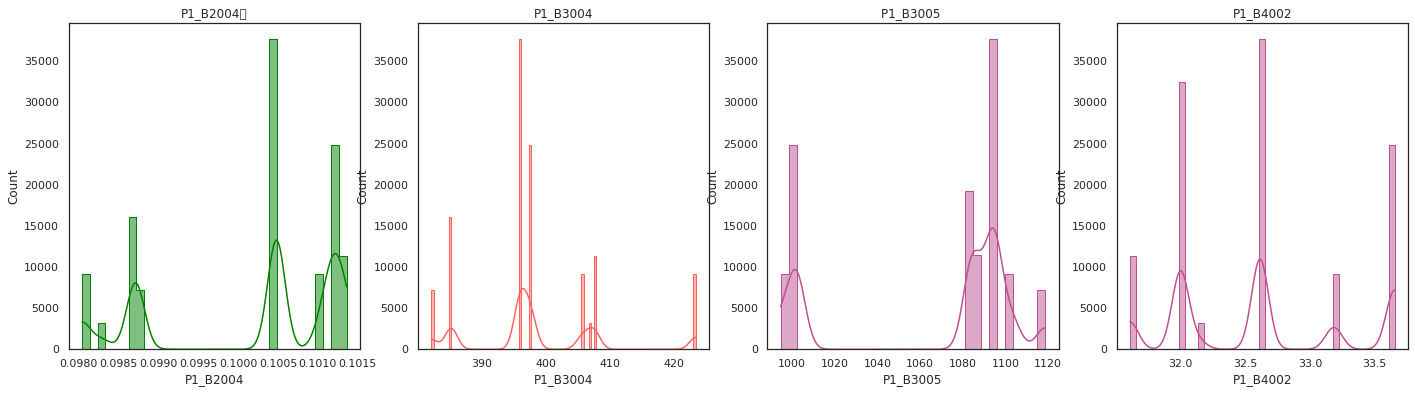

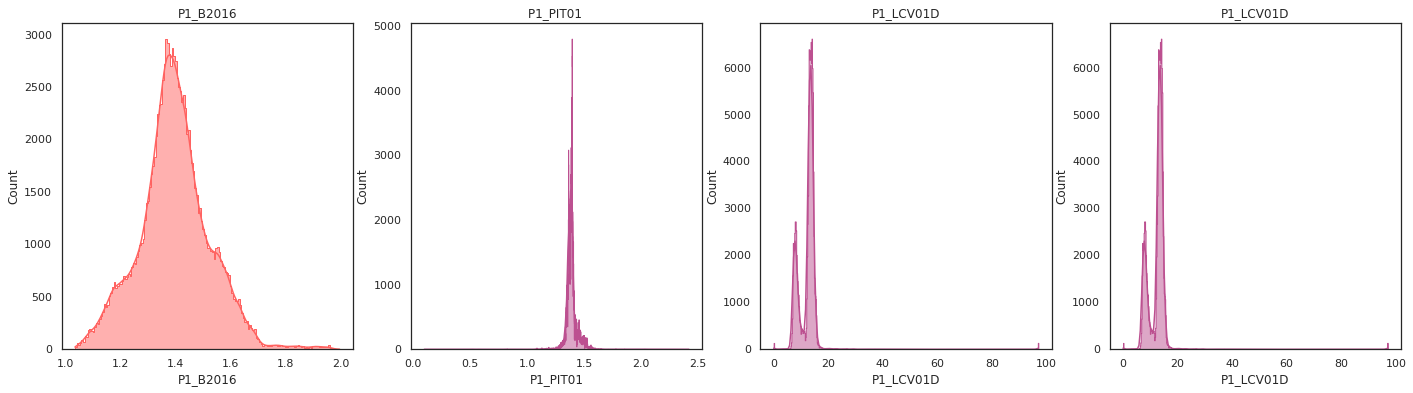

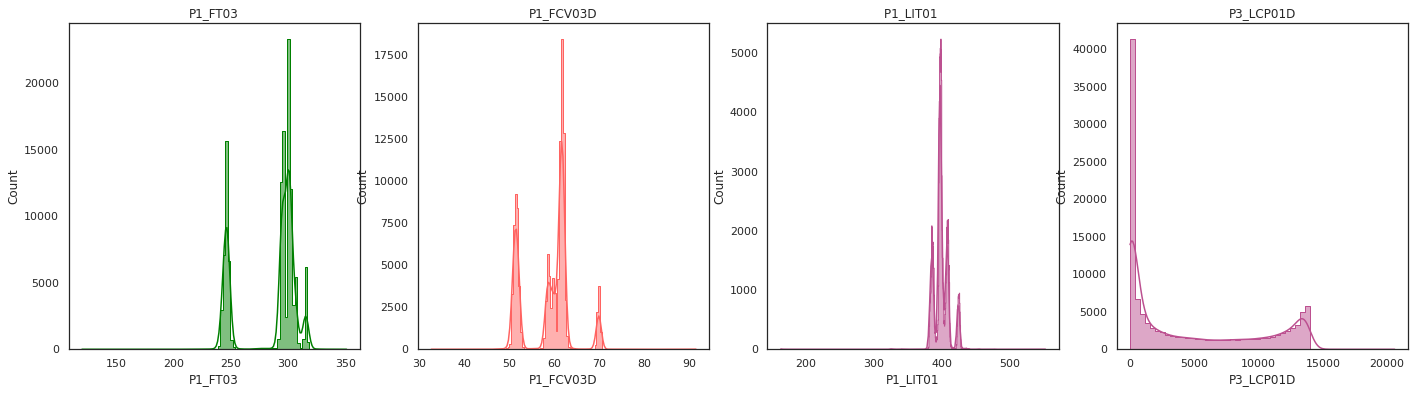

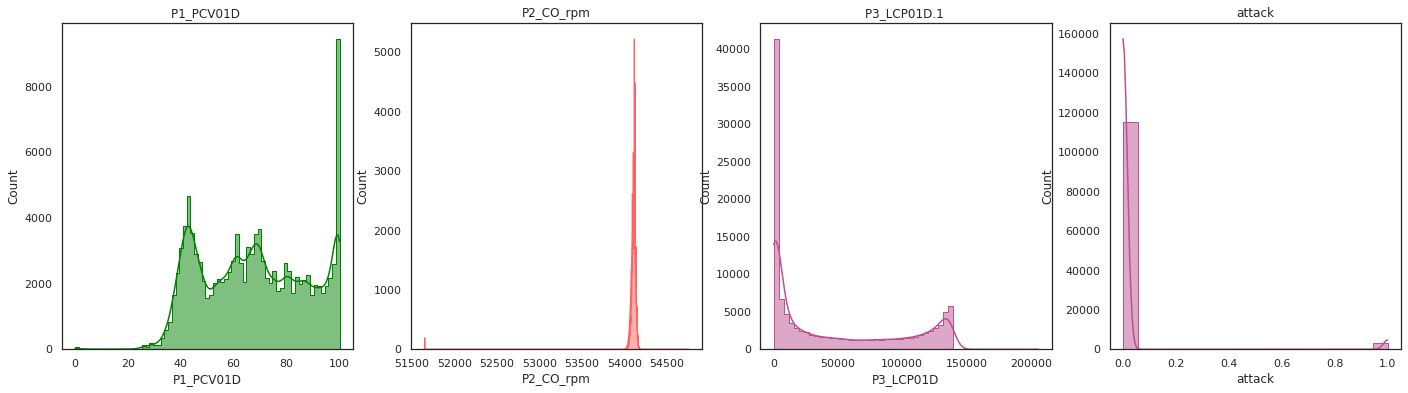

In [24]:
sns.set(style="white")
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sns.histplot(hai_data.P1_B2004	,  element="step",color="green", kde=True, ax=axs[ 0] ).set_title("P1_B2004	")
sns.histplot(hai_data.P1_B3004 ,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P1_B3004")
sns.histplot(hai_data.P1_B3005 ,  element="step",color="#bc5090", kde=True,ax=axs[2 ] ).set_title("P1_B3005 ")
sns.histplot(hai_data.P1_B4002,  element="step",color="#bc5090", kde=True,ax=axs[3] ).set_title("P1_B4002")
plt.show()
sns.set(style="white")
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sns.histplot(hai_data.P1_B2016 ,  element="step", color="#ff6361",kde=True, ax=axs[ 0]).set_title("P1_B2016")
sns.histplot(hai_data.P1_PIT01 ,  element="step",color="#bc5090", kde=True,ax=axs[1]).set_title("P1_PIT01 ")
sns.histplot(hai_data.P1_LCV01D,  element="step",color="#bc5090", kde=True,ax=axs[2]).set_title("P1_LCV01D")
sns.histplot(hai_data.P1_LCV01D,  element="step",color="#bc5090", kde=True,ax=axs[3]).set_title("P1_LCV01D")
plt.show()
sns.set(style="white")
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sns.histplot(hai_data.P1_FT03  ,  element="step",color="green", kde=True, ax=axs[0]).set_title("P1_FT03")
sns.histplot(hai_data.P1_FCV03D ,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P1_FCV03D")
sns.histplot(hai_data.P1_LIT01 ,  element="step",color="#bc5090", kde=True,ax=axs[2]).set_title("P1_LIT01 ")
sns.histplot(hai_data.P3_LCP01D,  element="step",color="#bc5090", kde=True,ax=axs[3]).set_title("P3_LCP01D")
plt.show()
sns.set(style="white")
fig, axs = plt.subplots(1,4, figsize=(24, 6))
sns.histplot(hai_data.P1_PCV01D   ,  element="step",color="green", kde=True, ax=axs[0]).set_title("P1_PCV01D ")
sns.histplot(hai_data.P2_CO_rpm ,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P2_CO_rpm")
sns.histplot(hai_data.P3_LCP01D/.1 ,  element="step",color="#bc5090", kde=True,ax=axs[2]).set_title("P3_LCP01D.1 ")
sns.histplot(hai_data.attack,  element="step",color="#bc5090", kde=True,ax=axs[3]).set_title("attack")
plt.show()

#### Density Plots
Density plots can provide us also with better understanding of the data distribution shape. Its like a histogram but its smooth line that used to summarize the distribution.

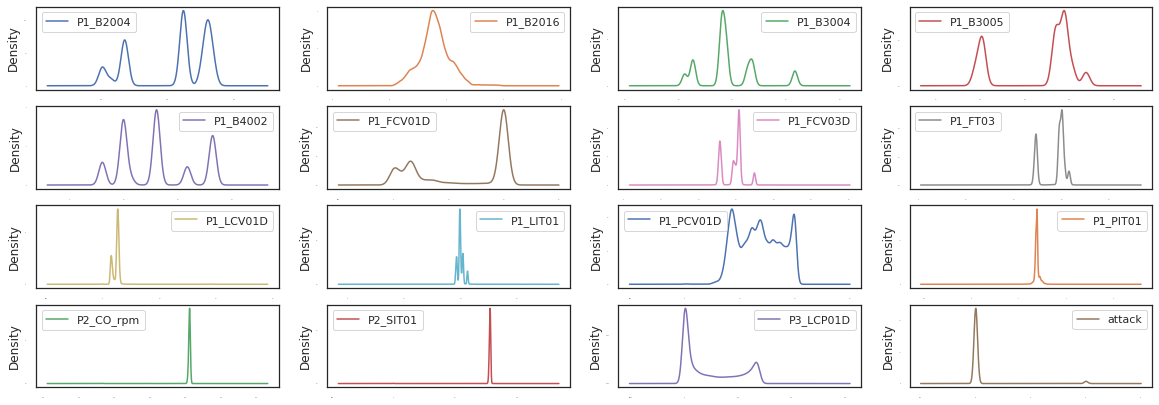

In [25]:
hai_data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True,fontsize=1)
plt.show()

#### Density Plots

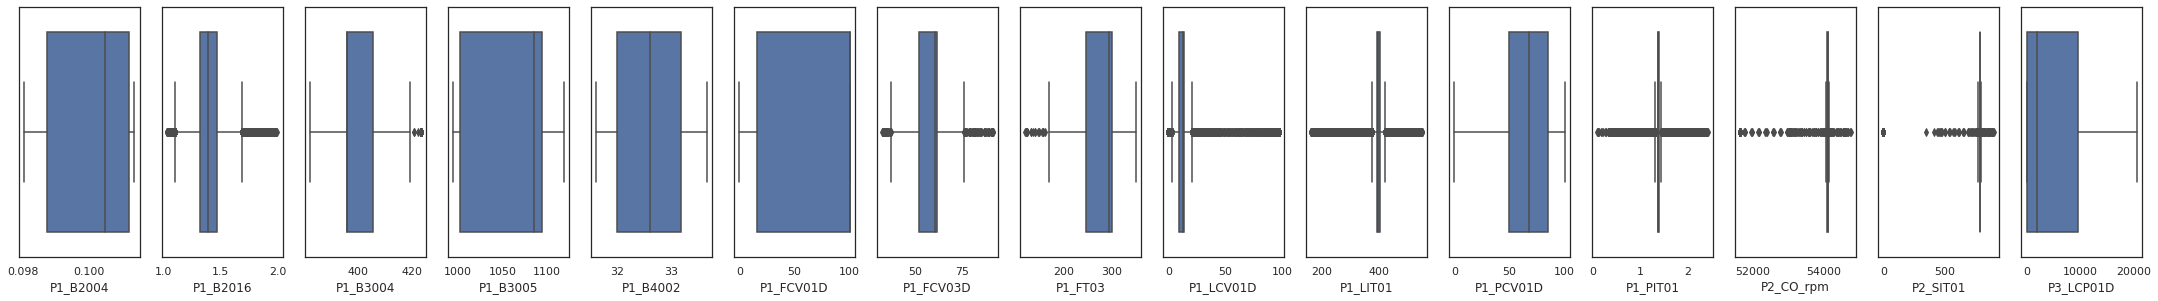

In [26]:
number_of_columns = len(hai_data.columns) 
plt.figure(figsize=(2*number_of_columns,8))
for category in range(0,number_of_columns - 1):
    plt.subplot(2 ,number_of_columns ,category+1)
    sns.boxplot(hai_data[hai_data.columns[category]], orient='v')
    plt.tight_layout()

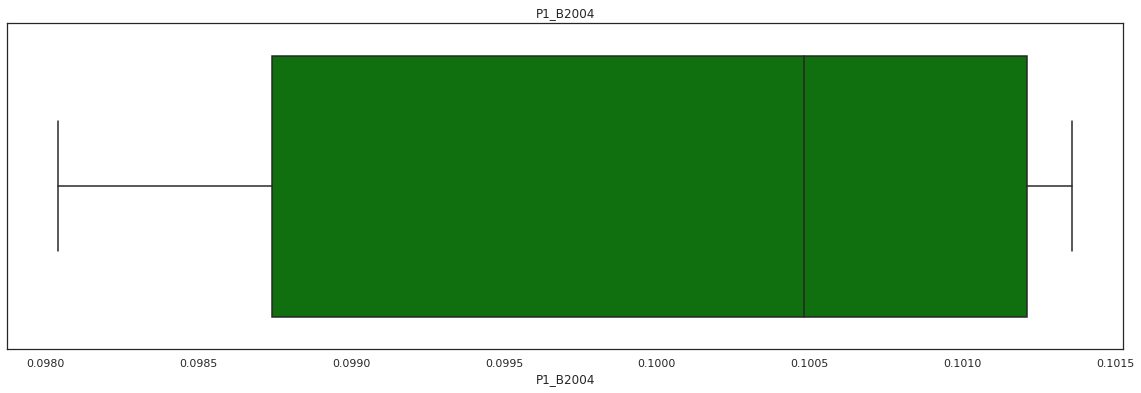

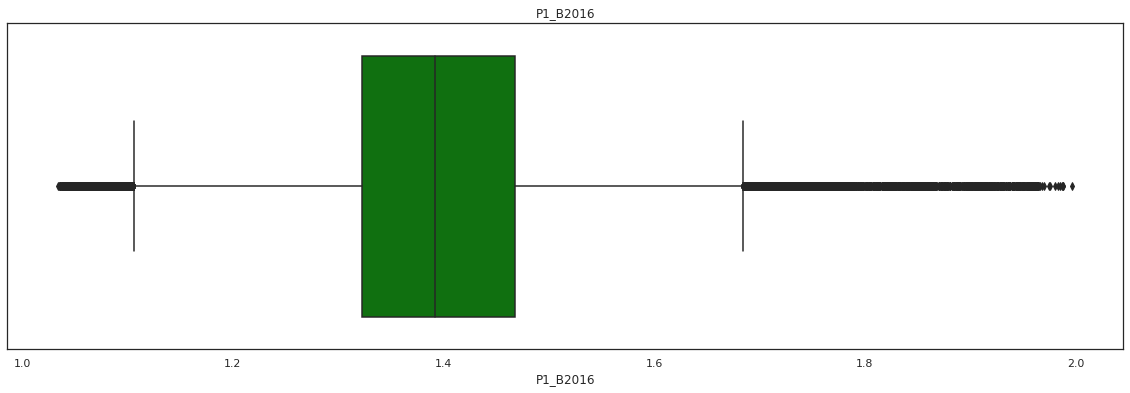

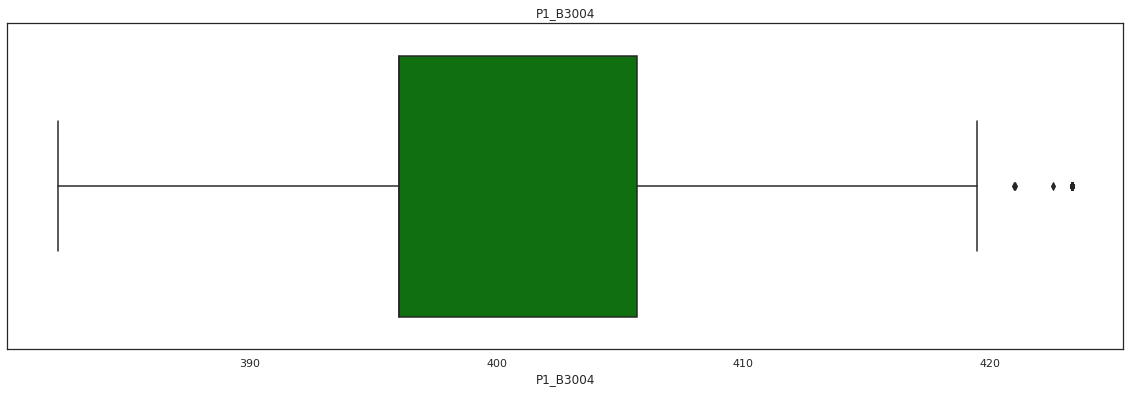

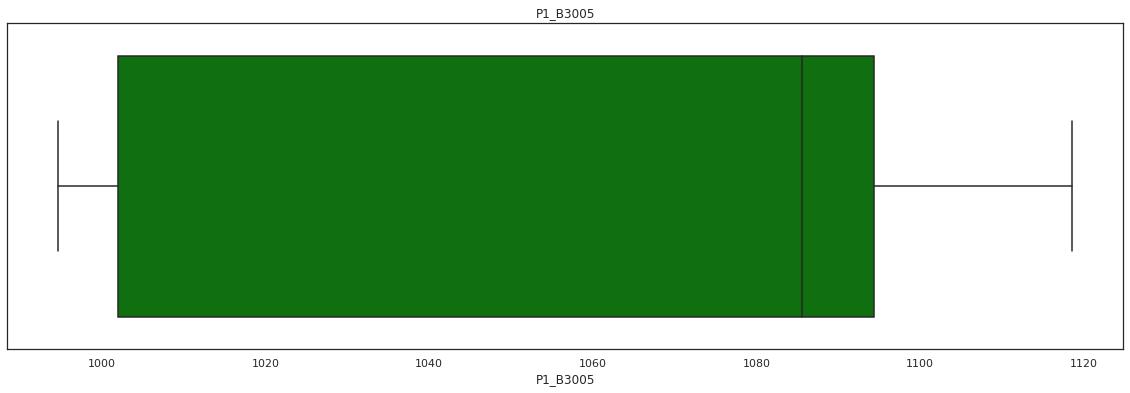

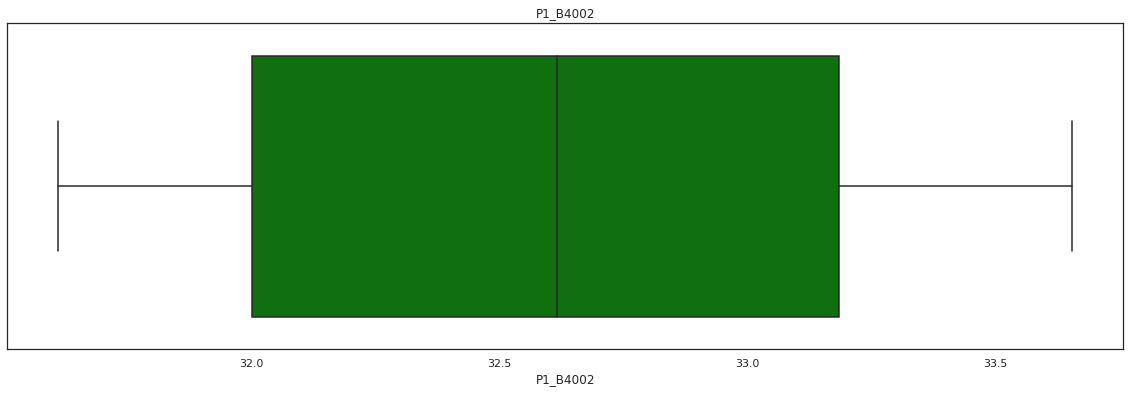

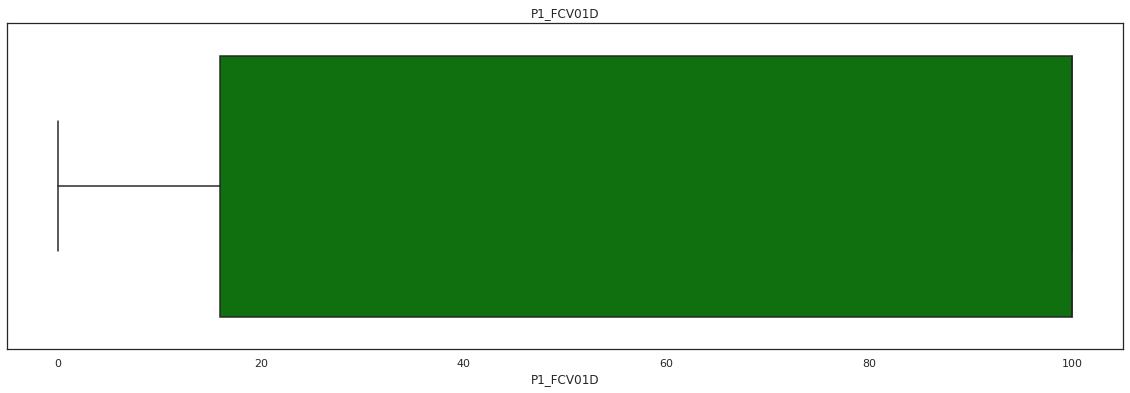

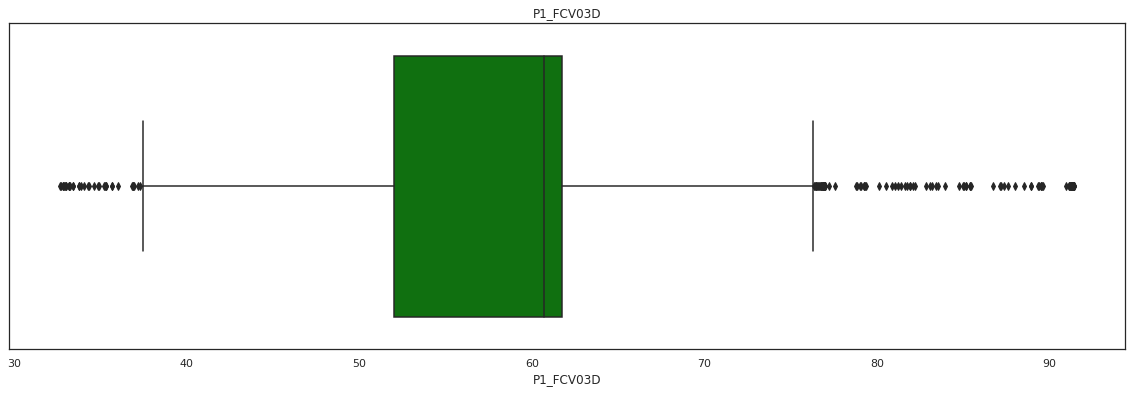

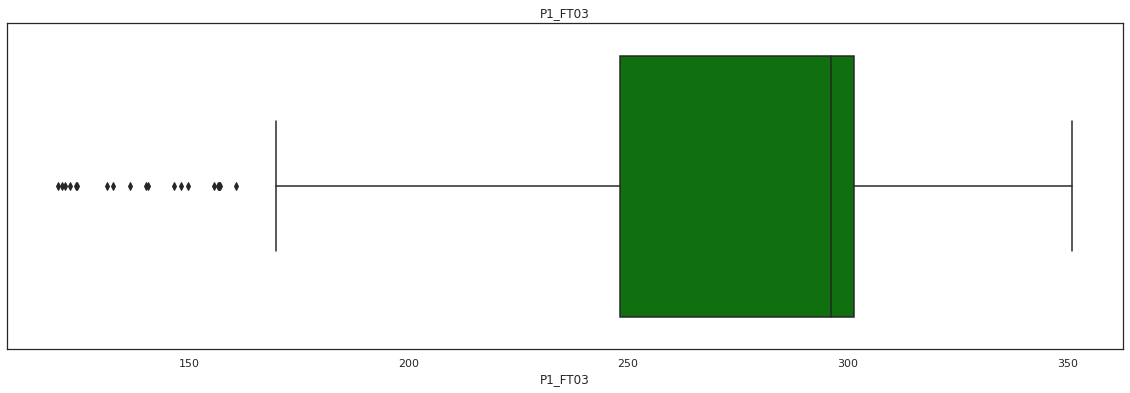

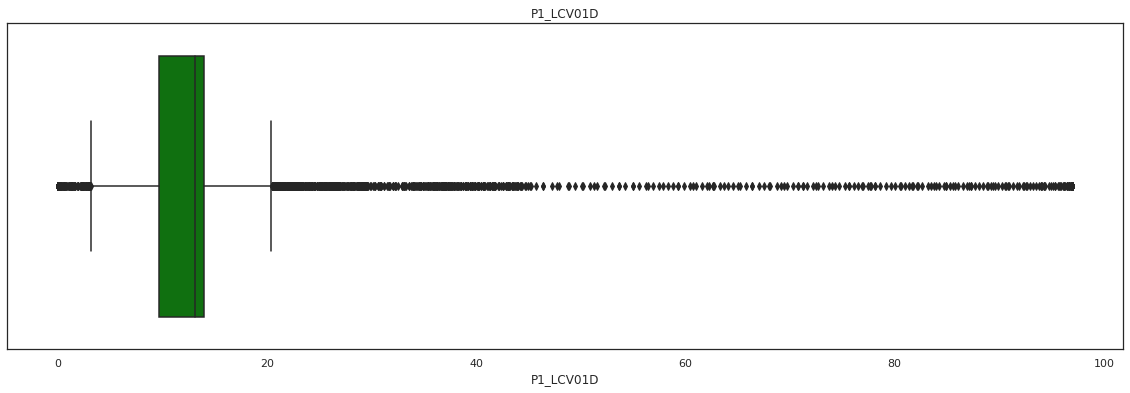

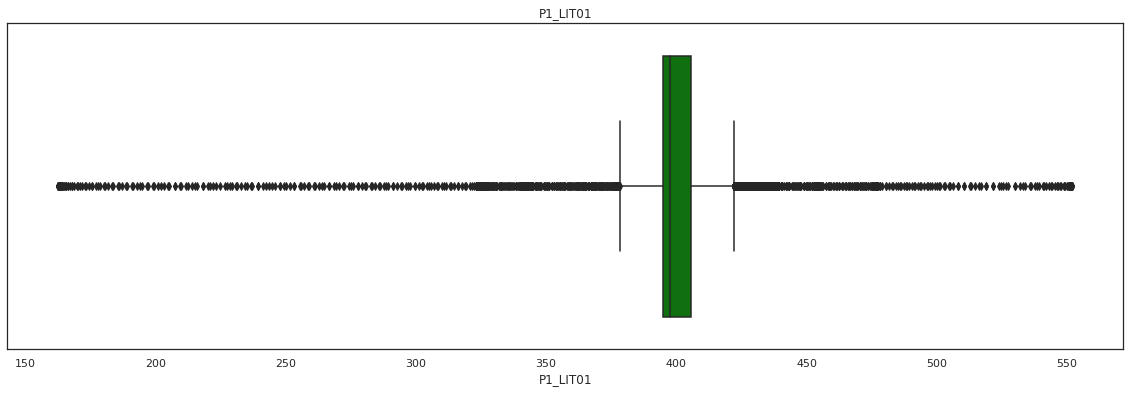

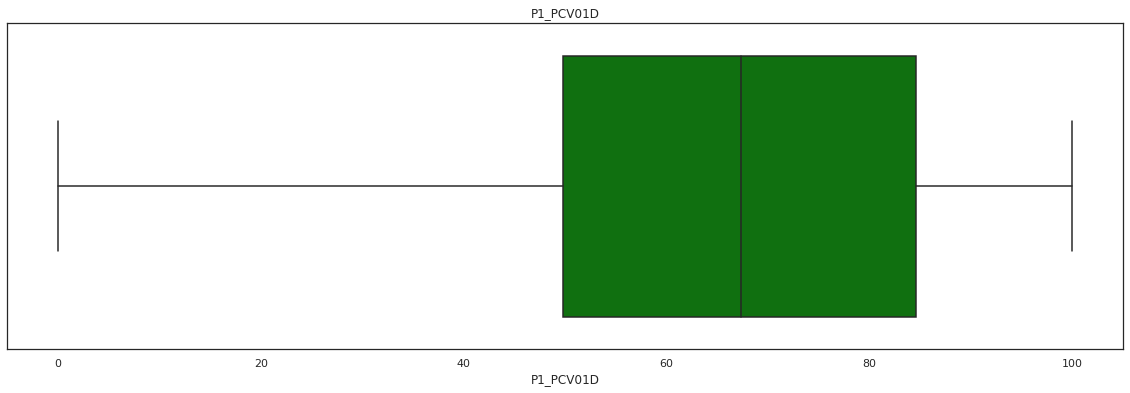

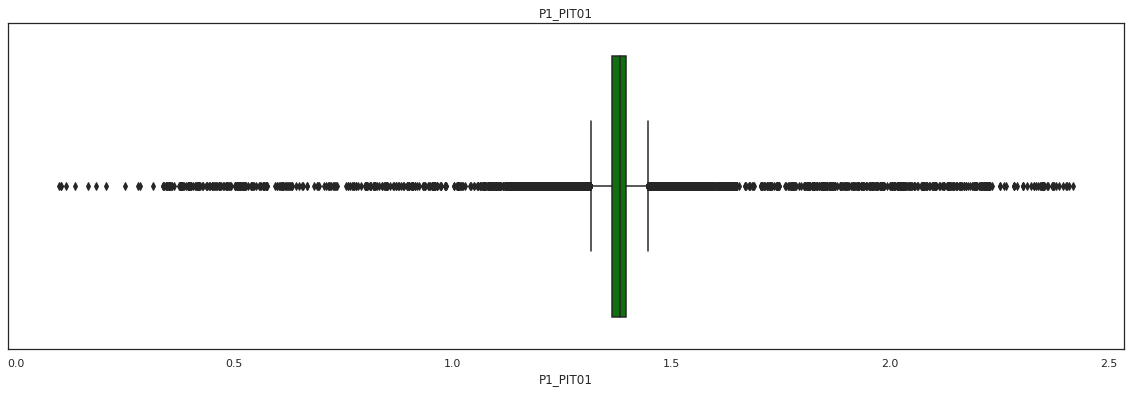

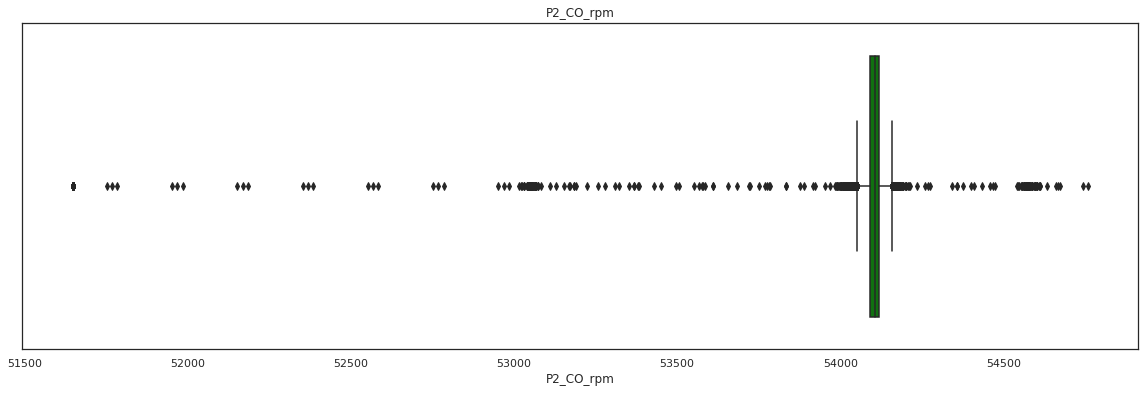

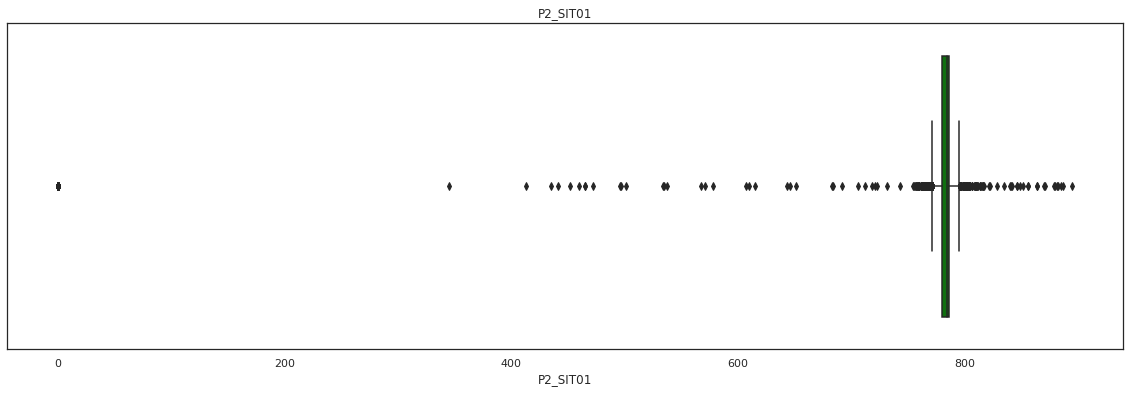

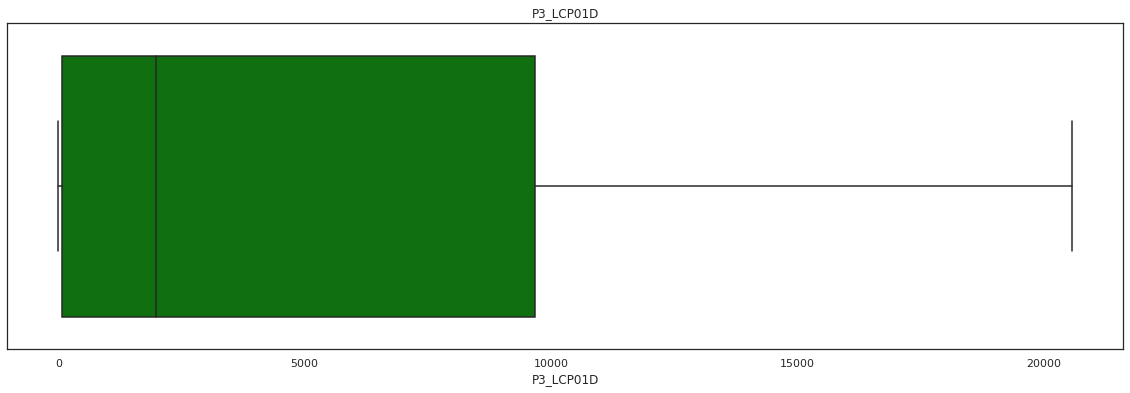

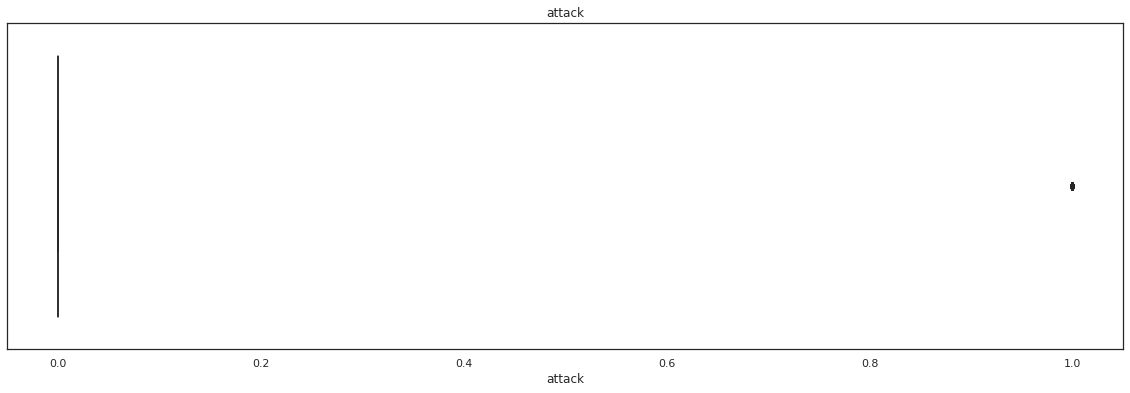

In [27]:
names=hai_data.columns
for name in names:
    _ = plt.figure(figsize=(20,6))
    _ = sns.boxplot(hai_data[name], color='green')
    _ = plt.title(name)
    plt.show()

Text(0, 0.5, 'ICS dataset - Frequency Percentage')

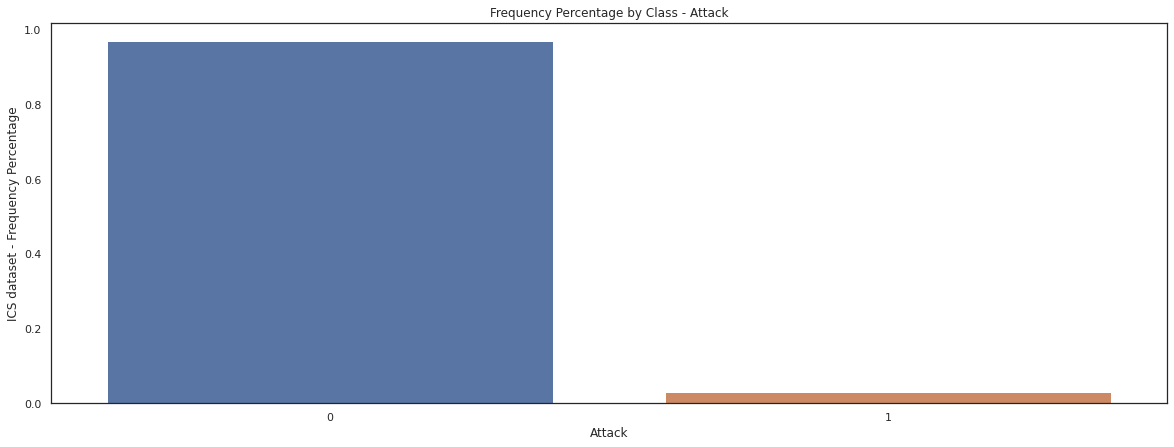

In [28]:
count_classes = pd.value_counts(hai_data['attack'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=[tuple(count_classes/len(hai_data))[0],tuple(count_classes/len(hai_data))[1]])
ax.set_title('Frequency Percentage by Class - Attack')
ax.set_xlabel('Attack')
ax.set_ylabel('ICS dataset - Frequency Percentage')

### 2. Multi-variate Analysis

#### Correaltion
We look at heatmap based on our partition models to look closely in to the correlation between group with the similar types. We will start with the correlation matrix.

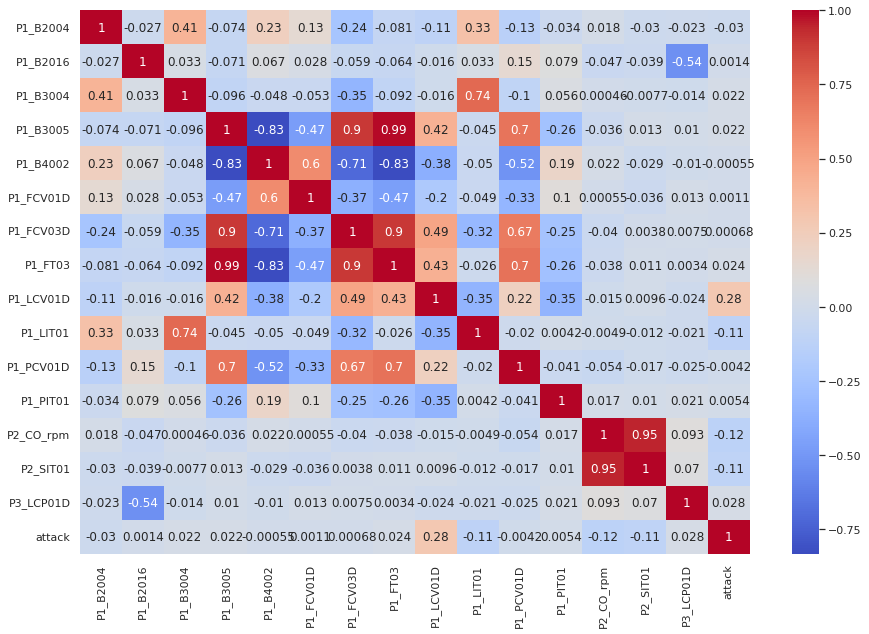

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(hai_data.corr(),annot=True,cmap='coolwarm')
plt.show()

In the above plot we can find negative and postitive correlation between each feature. The darker the color the close the feature correlated to the prediction goal.For example we find a positive correlation of 0.95 between P2_SIT01 & P2_CO_RPM  or between P1_B3005 and P1_FT03 .


###  <span style="color:blue">Exploratory Data Analysis (Statistical analysis)</span>

#### 1. Identifying Trend & Seasonality 

* <b>Trend</b>: presense of long-term increase or decrease in the sequence 
* <b>Seasonality</b>: variation that occurs at specific intervals of less than a year - span (daily, weekly, monthly) 
* <b>Cyclic Variations</b> : rises and falls that are not of a fixed frequency.

We did some additional graphical EDA on top of some quantitative EDA to check for trends and unusual behaviour. The sensor data plotted over time with the attack status of <b>"1" </b> put up in red on the same graph is really interesting.

That way, we can see exactly when the attack occured or any abnormalities and how the sensor values reflect it. The following code generates the aforementioned graph for each of the sensors/ setpoints reading :




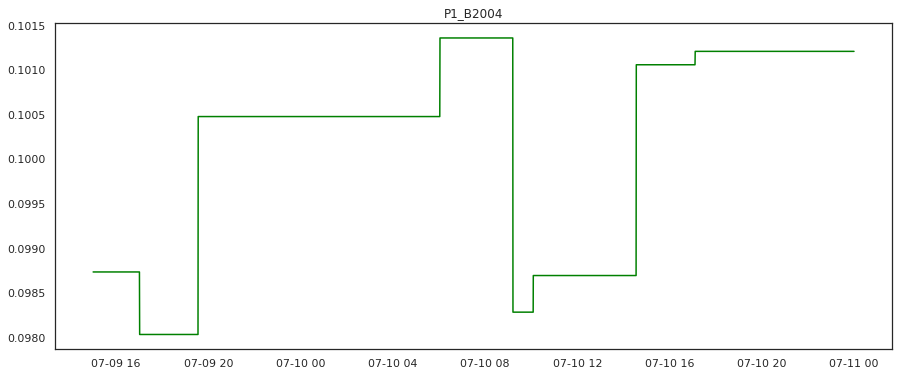

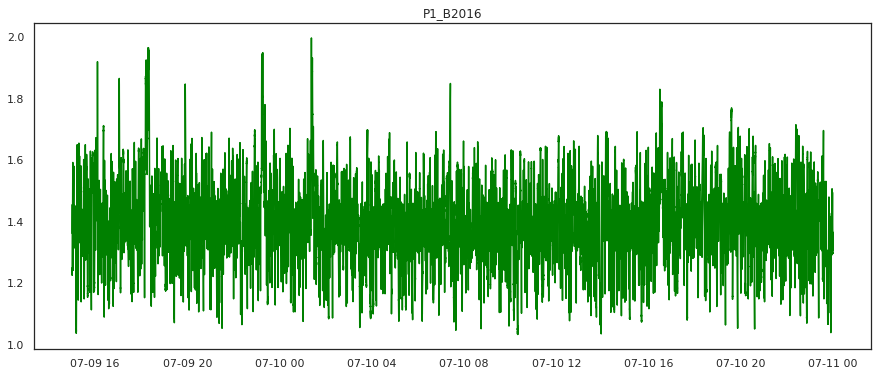

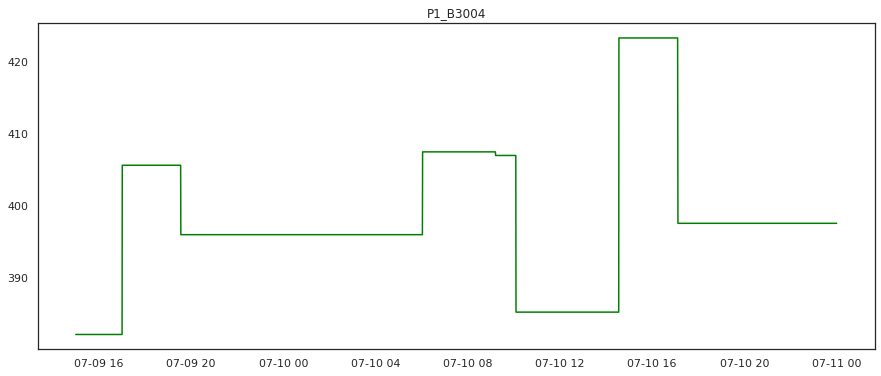

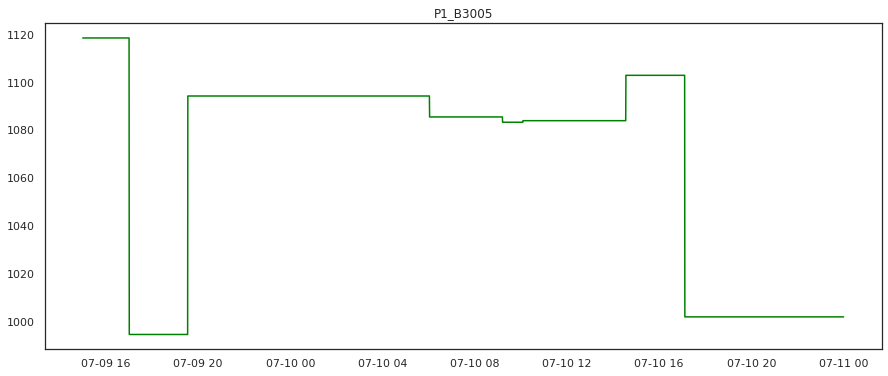

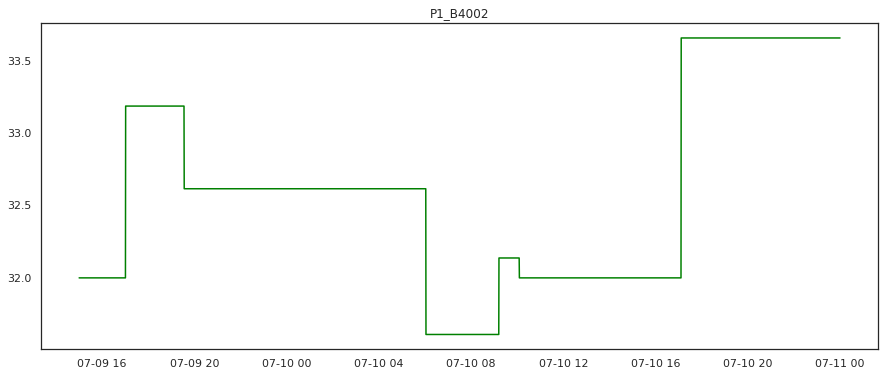

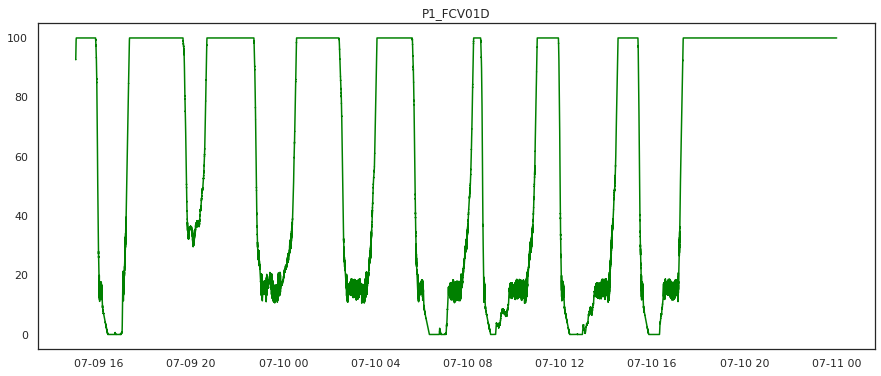

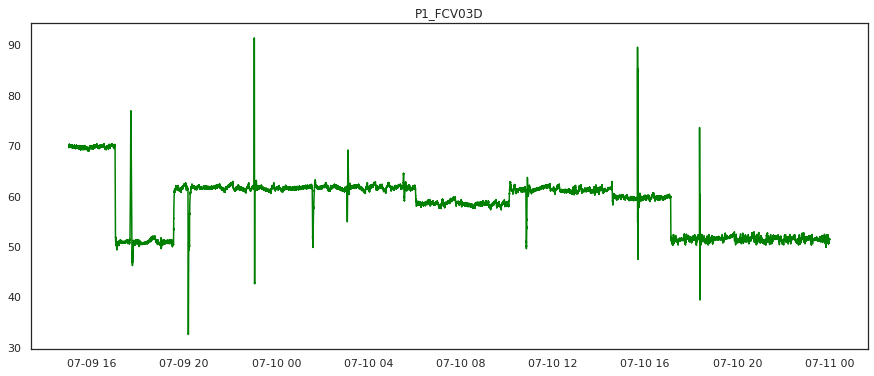

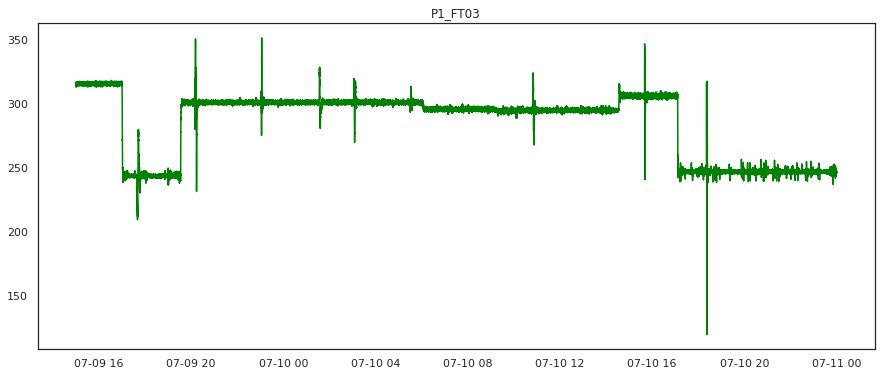

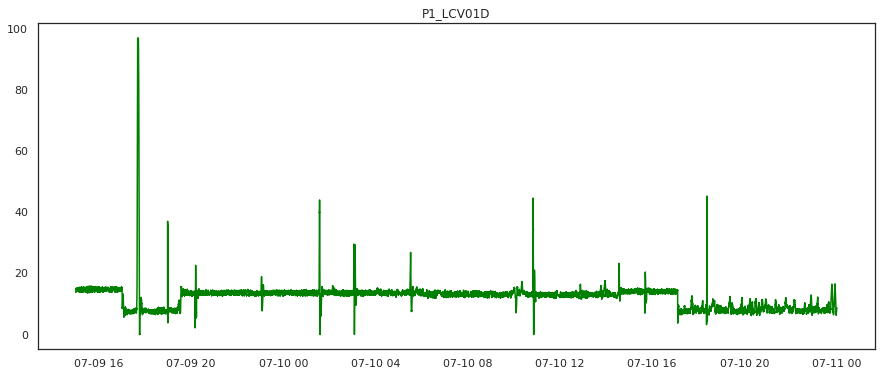

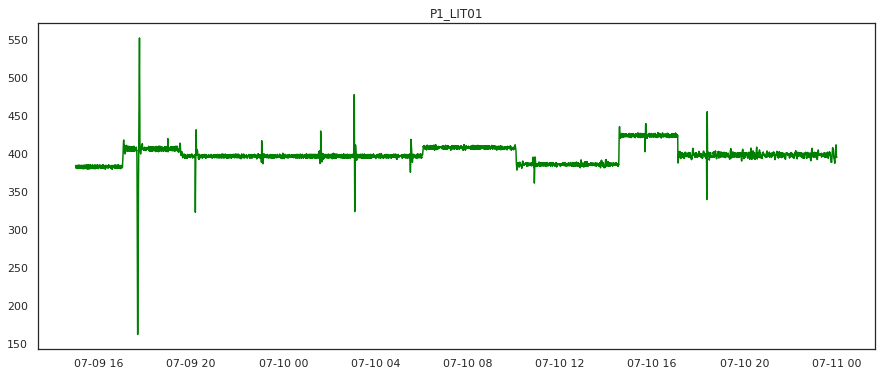

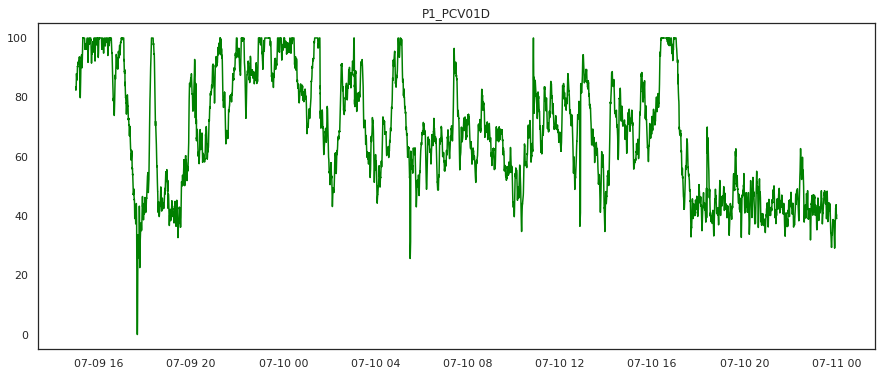

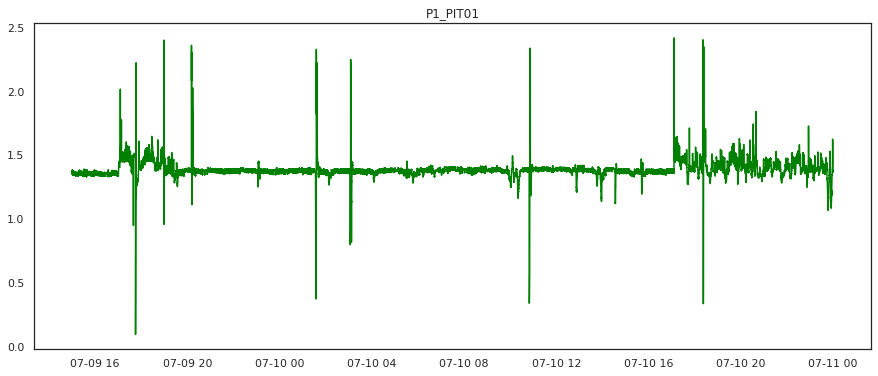

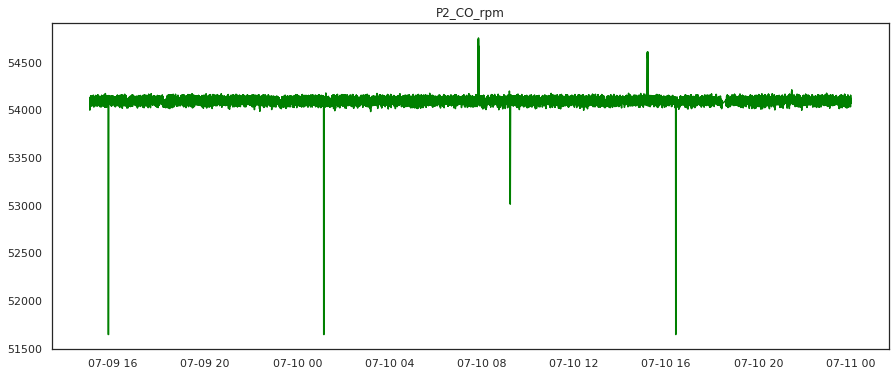

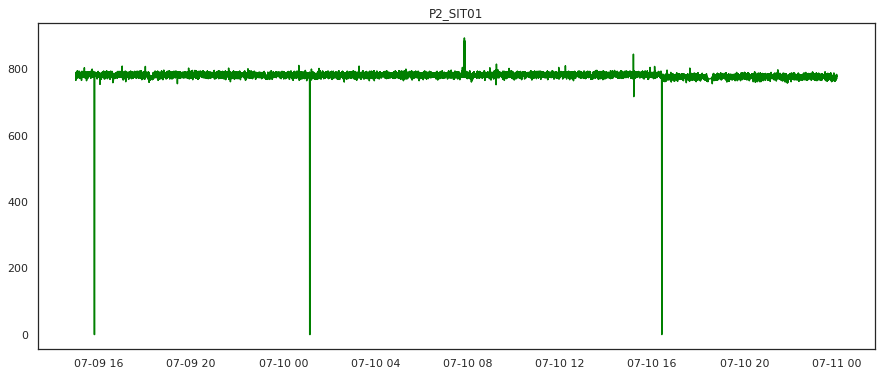

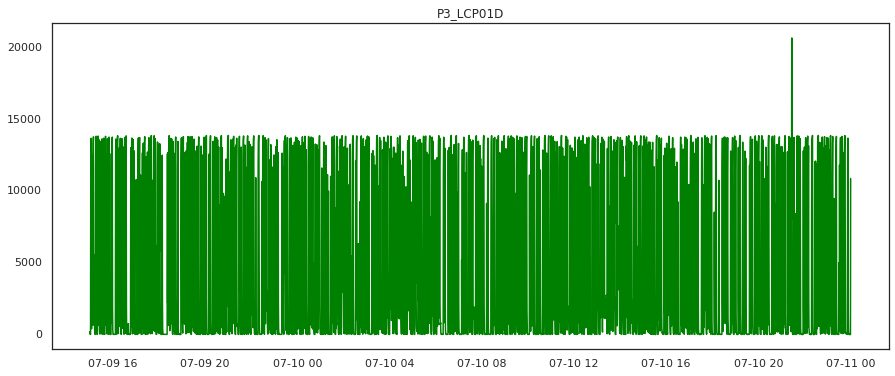

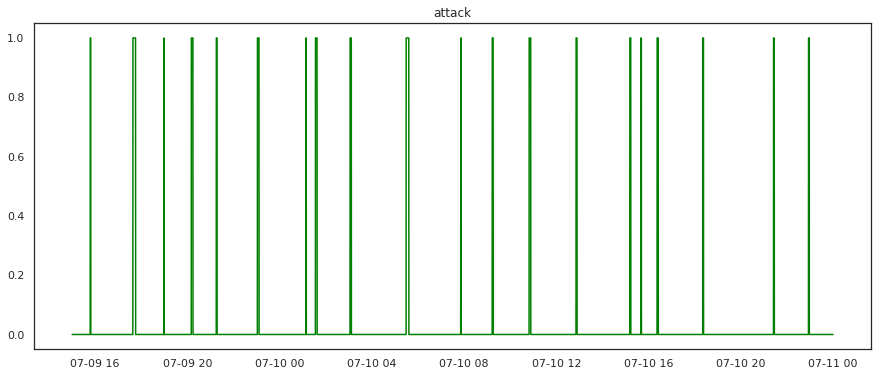

In [30]:
names=hai_data.columns
for name in names:
    _ = plt.figure(figsize=(15,6))
    _ = plt.plot(hai_data[name], color='green')
    _ = plt.title(name)
    plt.show()

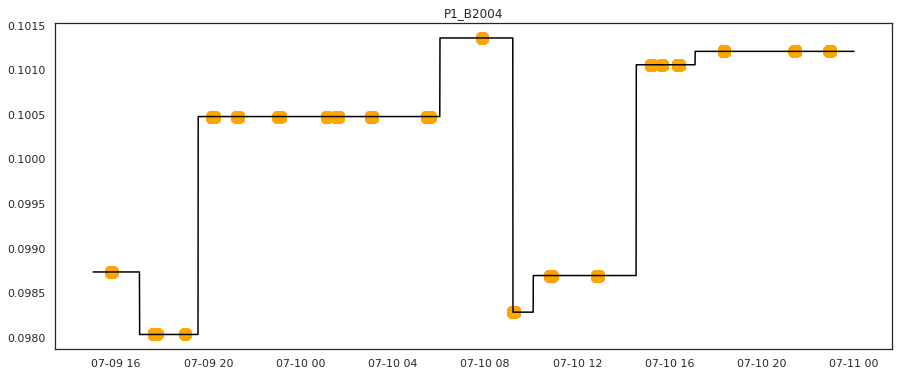

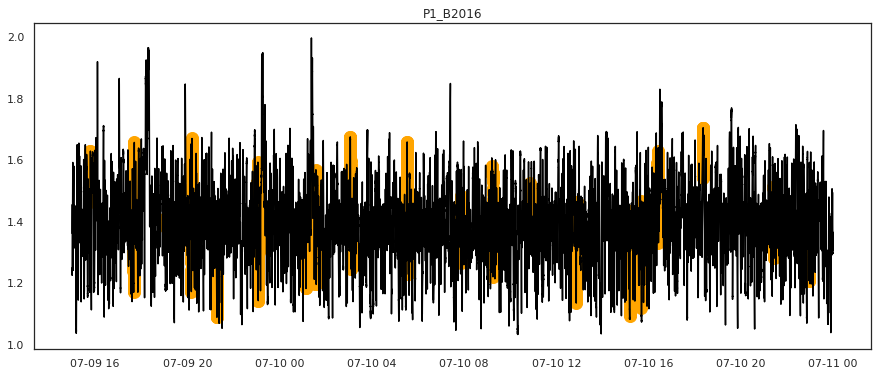

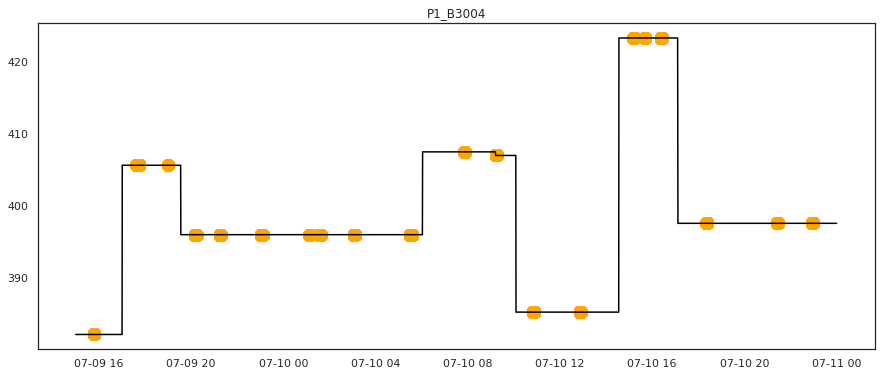

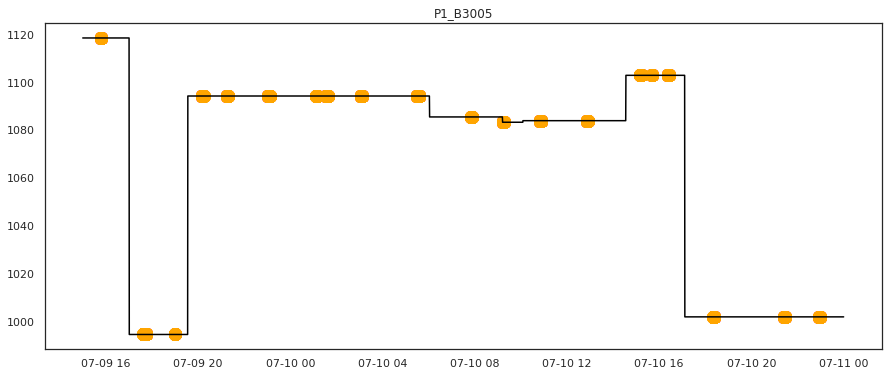

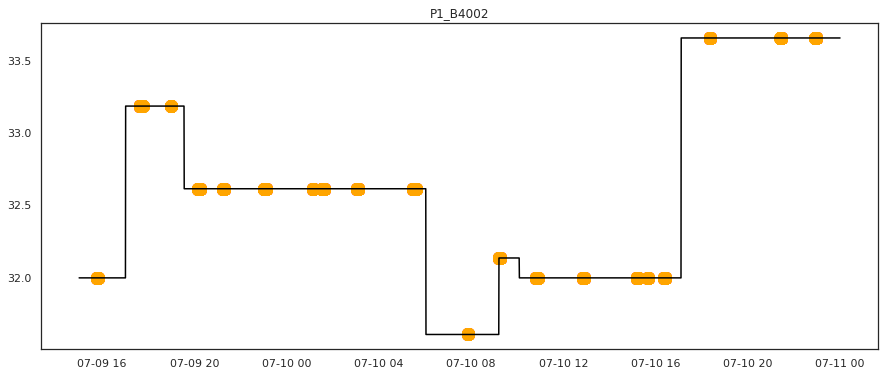

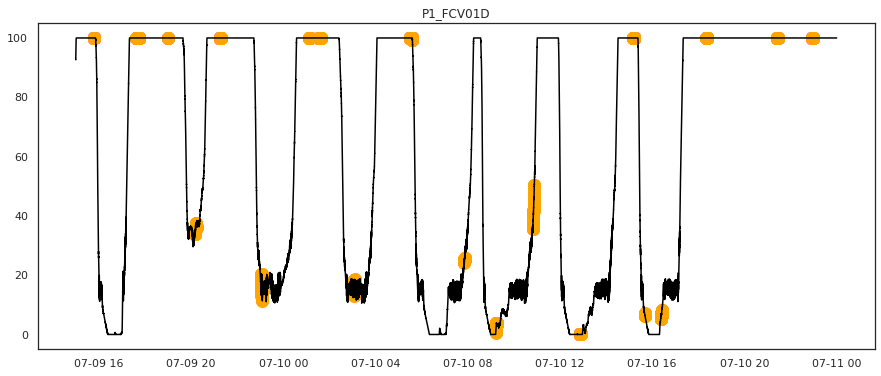

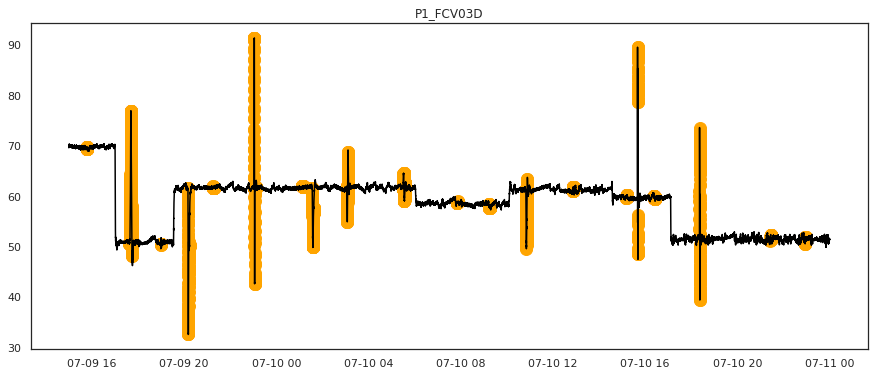

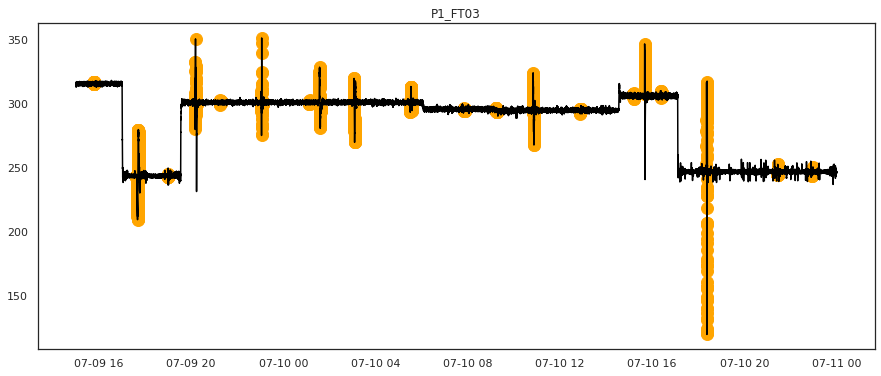

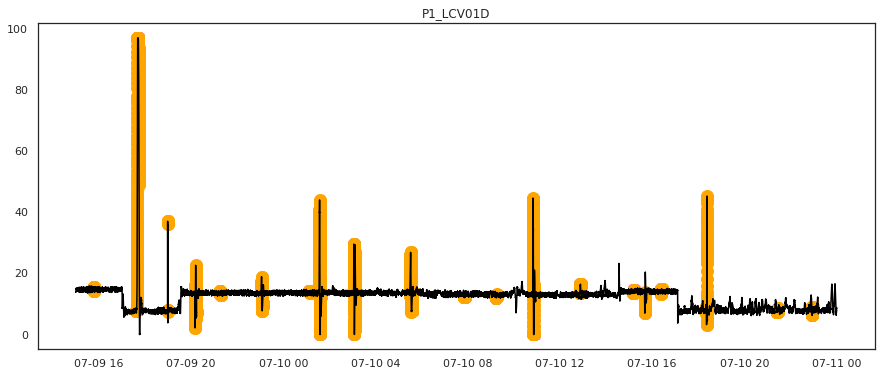

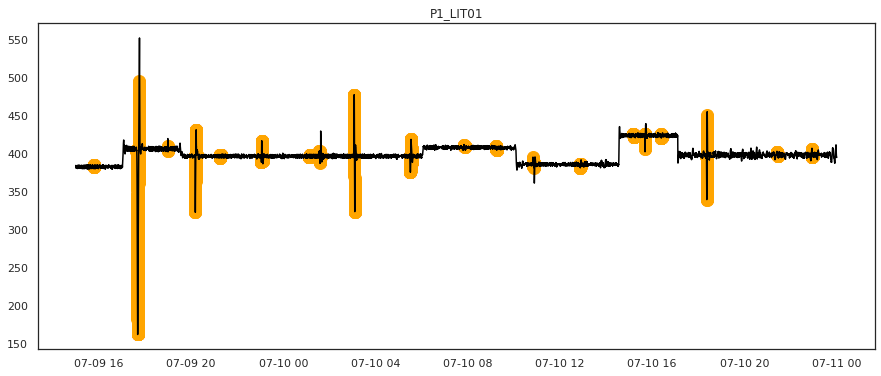

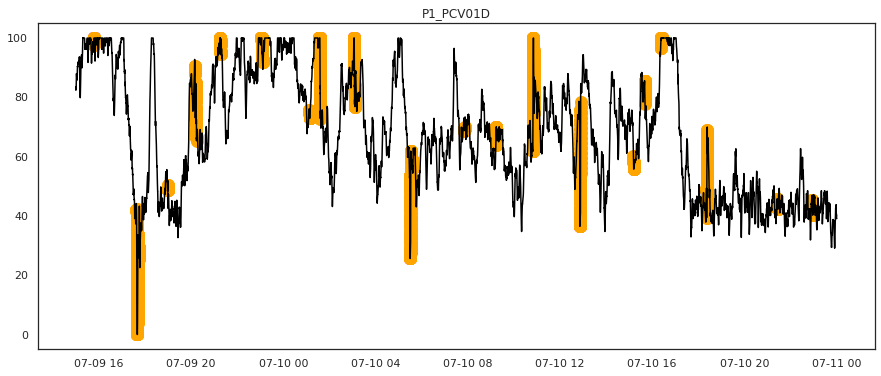

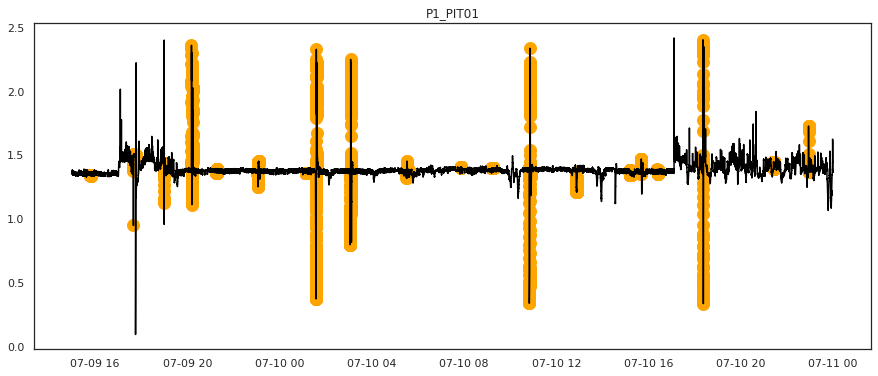

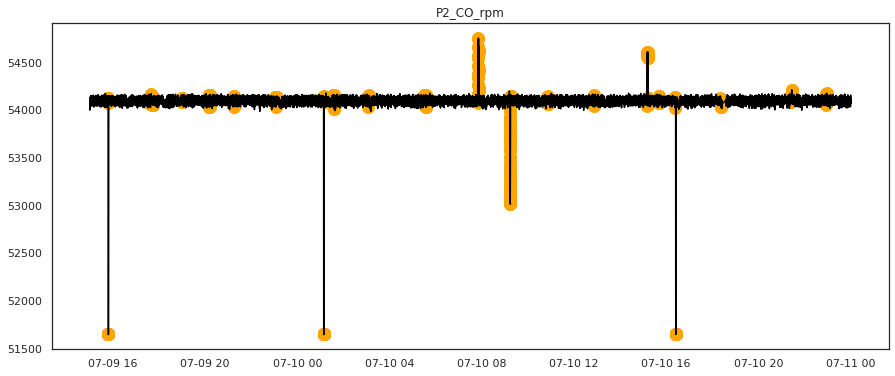

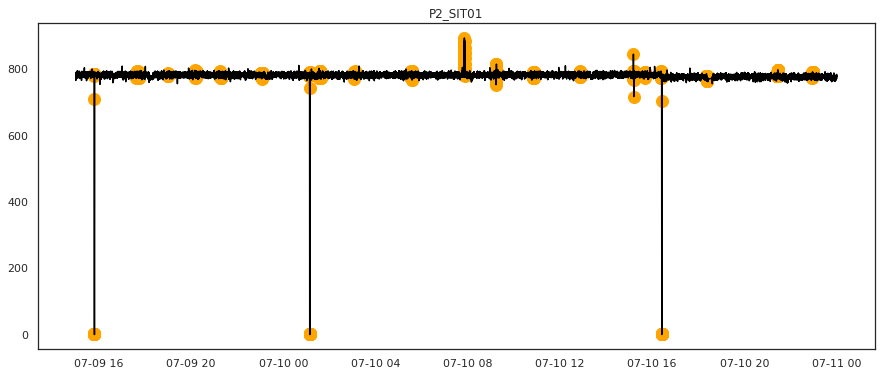

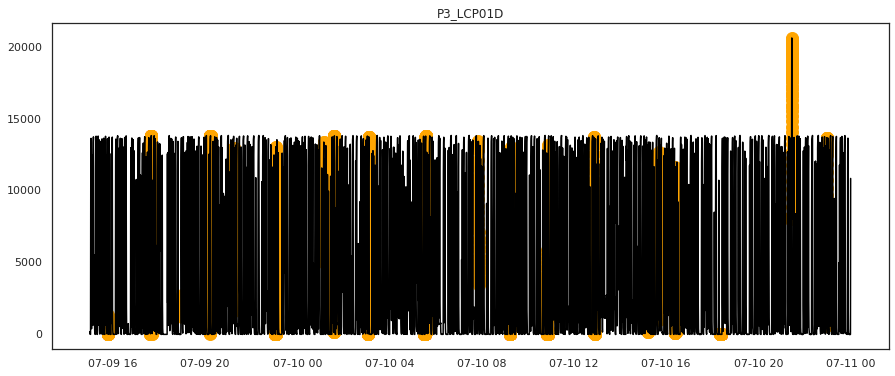

In [31]:
attck_state = hai_data[hai_data['attack'] == 1]
pred = hai_data.drop(['attack'], axis=1)
names=pred.columns
for name in names:
    _ = plt.figure(figsize=(15,6))
    _ = plt.plot(attck_state[name], linestyle='none', marker='o', color='orange', markersize=12)
    _ = plt.plot(hai_data[name], color='black')
    _ = plt.title(name)
    #_ = plt.savefig('Trends'+str(name)+'.png')
    #plt.clf()
    plt.show()

The red marks, which represent the attack on the system, exactly overlap with the observed sensor reading irregularities, as seen in the above plot. We now have a solid idea of how each sensor reading behaves when attack or during abnormalities versus when it is working regularly or in the normal codition.


#### 2. Autocorrelation & Stationarity

It is critical in time series analysis that the data be steady and free of autocorrelation.

Autocorrelation: is the behavior of data when it is correlated with itself at a different time period. 

Stationarity :  Property of time series not to change distribution over time.

In [32]:
def stationarity_test(tsdata, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(tsdata, autolag='AIC')
    else:
        adf_test = adfuller(tsdata[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

adf_test_results = {col: stationarity_test(hai_data, col)for col in hai_data.columns}
adf_test_results

{'P1_B2004': 'Non-Stationary',
 'P1_B2016': 'Stationary',
 'P1_B3004': 'Stationary',
 'P1_B3005': 'Non-Stationary',
 'P1_B4002': 'Non-Stationary',
 'P1_FCV01D': 'Stationary',
 'P1_FCV03D': 'Stationary',
 'P1_FT03': 'Stationary',
 'P1_LCV01D': 'Stationary',
 'P1_LIT01': 'Stationary',
 'P1_PCV01D': 'Stationary',
 'P1_PIT01': 'Stationary',
 'P2_CO_rpm': 'Stationary',
 'P2_SIT01': 'Stationary',
 'P3_LCP01D': 'Stationary',
 'attack': 'Stationary'}

In [33]:
# Differencing Python Function
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data
# Iterate through the columns
for col in hai_data.columns:
    hai_data[col] = differencing(hai_data, col, 1)

# Running the stationary check again
adf_test_results = {col: stationarity_test(hai_data, col)for col in hai_data.columns}

# Stationary results
adf_test_results

{'P1_B2004': 'Stationary',
 'P1_B2016': 'Stationary',
 'P1_B3004': 'Stationary',
 'P1_B3005': 'Stationary',
 'P1_B4002': 'Stationary',
 'P1_FCV01D': 'Stationary',
 'P1_FCV03D': 'Stationary',
 'P1_FT03': 'Stationary',
 'P1_LCV01D': 'Stationary',
 'P1_LIT01': 'Stationary',
 'P1_PCV01D': 'Stationary',
 'P1_PIT01': 'Stationary',
 'P2_CO_rpm': 'Stationary',
 'P2_SIT01': 'Stationary',
 'P3_LCP01D': 'Stationary',
 'attack': 'Stationary'}